<a href="https://colab.research.google.com/github/Hoangthang017/CS114.K21/blob/master/FaceMask/DemoFaceMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Demo** 

In [7]:
#import thư viện
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import cv2

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# load model
model_FM = load_model('/content/drive/My Drive/CS114/FaceMask')

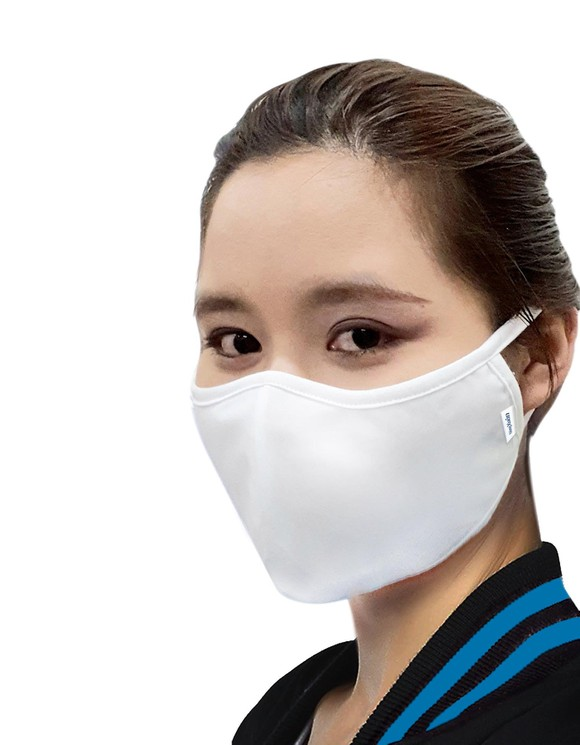



------------ Mask ------------


In [10]:
# load ảnh cần predict vào
url = "/content/khâu trang.jpg"
image = cv2.imread(url)
img_copy = image.copy()

# pre-process image
img = cv2.resize(img_copy, (224,224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

# predict image được đưa vào
(mask, withoutMask) = model_FM.predict(img)[0]

# Kết quả
cv2_imshow(image) 
if (mask > withoutMask):
  label = "Mask"
else:
  label = "No Mask"
print("\n\n------------",label,"------------")


#**Nhận diện khuôngmặt có đeo khẩu trang không**

In [14]:
# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
prototxtPath = '/content/drive/My Drive/CS114/FaceMask/face_detector/deploy.prototxt'
weightsPath = '/content/drive/My Drive/CS114/FaceMask/face_detector/res10_300x300_ssd_iter_140000.caffemodel'
	
net = cv2.dnn.readNet(prototxtPath, weightsPath)

[INFO] loading face detector model...


In [18]:
def Func_Predict(detections):
# loop over the detections
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2]

		# filter out weak detections by ensuring the confidence is
		# greater than the minimum confidence
		if confidence > 0.5:
			# compute the (x, y)-coordinates of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

			# ensure the bounding boxes fall within the dimensions of
			# the frame
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

			# extract the face ROI, convert it from BGR to RGB channel
			# ordering, resize it to 224x224, and preprocess it
			face = image[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (224, 224))
			face = img_to_array(face)
			face = preprocess_input(face)
			face = np.expand_dims(face, axis=0)

			# pass the face through the model to determine if the face
			# has a mask or not
			(mask, withoutMask) = model_FM.predict(face)[0]

			# determine the class label and color we'll use to draw
			# the bounding box and text
			label = "Mask" if mask > withoutMask else "No Mask"
			color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

			# include the probability in the label
			label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

			# display the label and bounding box rectangle on the output
			# frame
			cv2.putText(image, label, (startX, startY - 10),
				cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
			cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
	from google.colab.patches import cv2_imshow
	cv2_imshow(image)

[INFO] computing face detections...


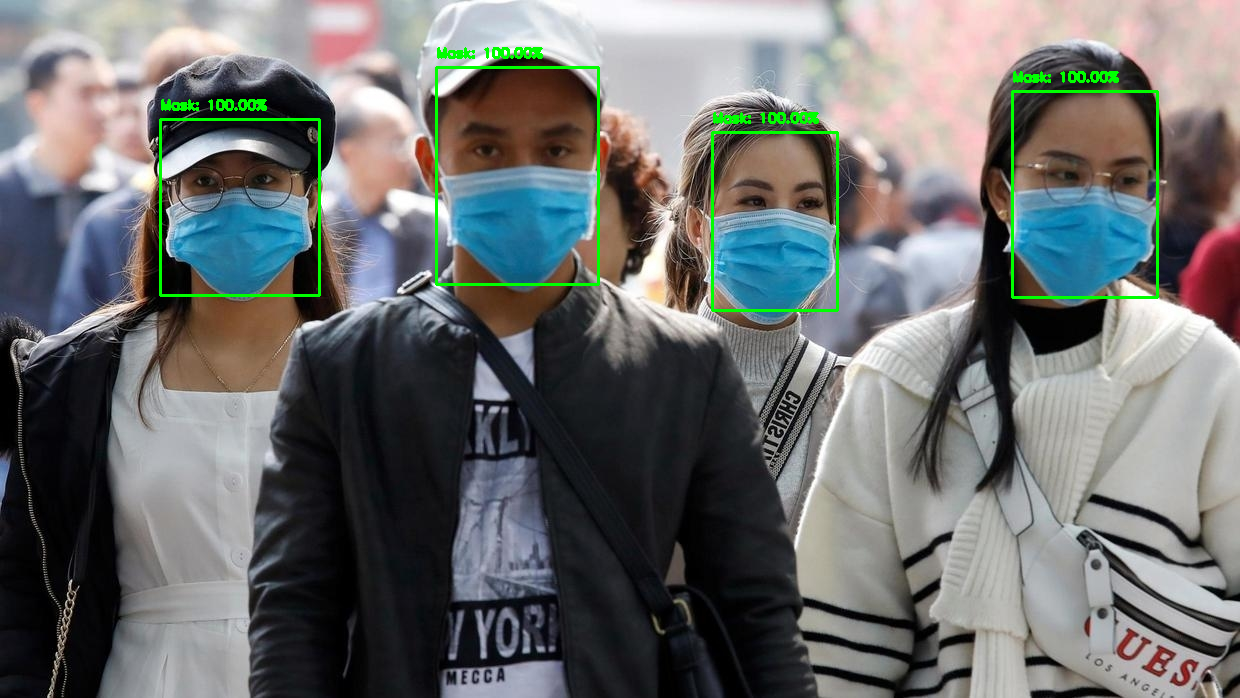

In [19]:
from google.colab.patches import cv2_imshow
url = "/content/ex_6.jpg"
image = cv2.imread(url)
orig = image.copy()
(h, w) = image.shape[:2]
# construct a blob from the image
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),(104.0, 177.0, 123.0))
# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
net.setInput(blob)
detection = net.forward()
Func_Predict(detection)